# Edge Detection
An edge is a place of rapid change in the image intensity function, where **gradients** are introduced.

Partial derivatives of an image: for 2D function $f(x, y)$, the partial derivative w.r.t. $x$ is

$$
\frac{\partial f(x, y)}{\partial x}=\lim _{\varepsilon \rightarrow 0} \frac{f(x+\varepsilon, y)-f(x, y)}{\varepsilon}
$$

For **discrete data**, we can approximate using finite differences:

$$
\frac{\partial f(x, y)}{\partial x}=\frac{f(x+1, y)-f(x, y)}{1}
$$

## Gradient $\bigtriangledown f =  (\frac{\partial f}{\partial x}, \frac{\partial f}{\partial y})$

```{figure} ../../../images/edge/gradient.jpg
---
scale: 120%
---
```

```{figure} ../../../images/edge/operator.jpg
---
scale: 60%
---
```

```{admonition} Gradient operators
Kernel size affects localization and noise sensitive.
```

## Sobel and Laplacian operators

Modules imported ...

In [8]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
from skimage import io as io_url
import importlib

import myfunc.mysubplot
importlib.reload(myfunc.mysubplot)

from myfunc.canny import non_max_suppression, double_threshold, hysteresis,sobel_filter,canny_detector

In [4]:
frame = io_url.imread('../images/lena.jpg', as_gray=True)

k = 3 # Kernel size
# Apply Gaussian filter to cancel the noise first
frame = cv2.GaussianBlur(frame,(5,5), sigmaX=1, sigmaY=1)
sobel_x = cv2.Sobel(frame,-1,1,0,ksize=k)
sobel_y = cv2.Sobel(frame,-1,0,1,ksize=k)
magnitude, angle = sobel_filter(frame)

laplacian = cv2.Laplacian(frame,-1,ksize=k)
data = 255*magnitude/magnitude.max()
data = data.astype(np.uint8)
ret,th = cv2.threshold(data.astype(np.uint8),0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)

Here is a fancy way to [subplot](https://github.com/EeToSe/image-cv/blob/main/myfunc/mysubplot.py) **grayscale** images

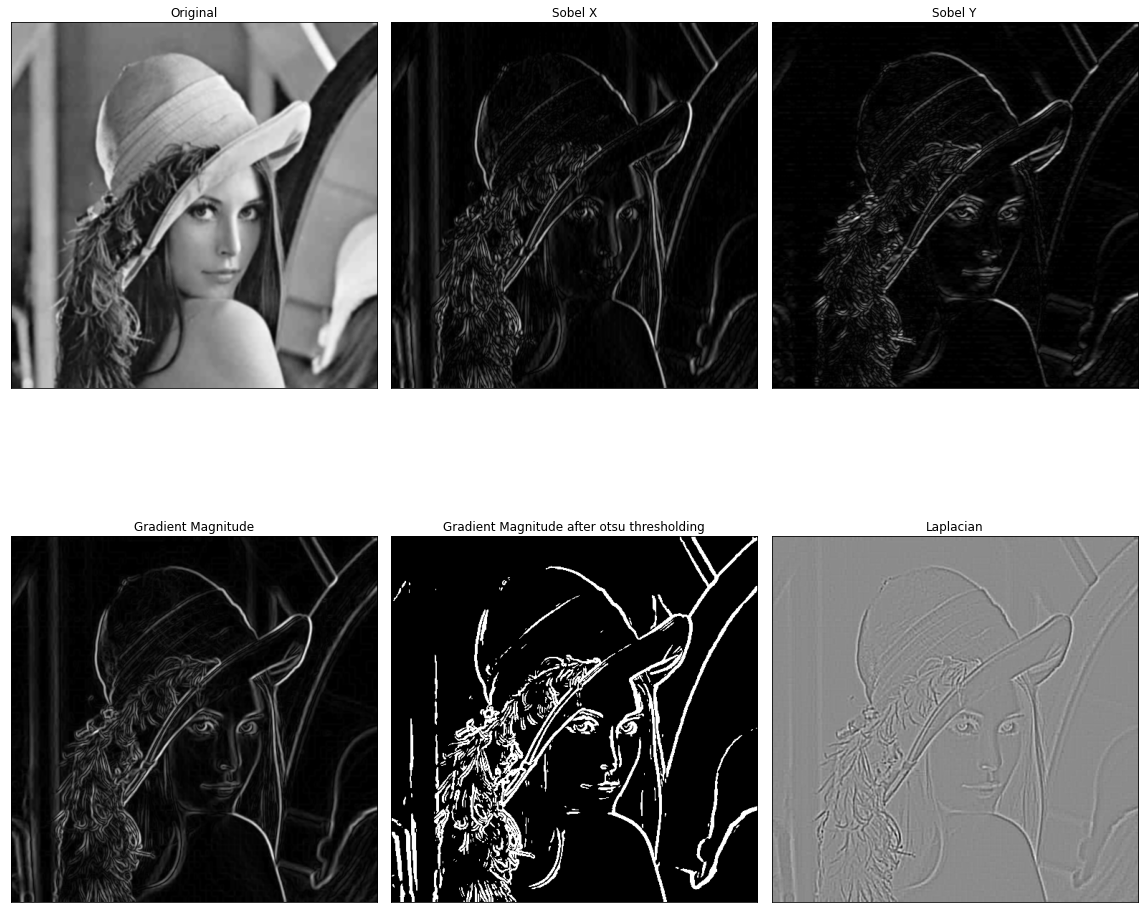

Ha, nice plots!


In [9]:
fig = plt.subplots(nrows=2, ncols=3, figsize=(16, 16))
titles = ['Original','Sobel X','Sobel Y','Gradient Magnitude','Gradient Magnitude after otsu thresholding','Laplacian']
images = [frame, np.abs(sobel_x)/np.abs(sobel_x).max(), np.abs(sobel_y)/np.abs(sobel_y).max(), magnitude, th, laplacian]
myfunc.mysubplot.subplots(images, titles, 2, 3)

The otsu thresholoding and other thresholding approaches could see [this page](../2/fuzzy.ipynb)

## Canny Edge Detector
A step-by-step [link](https://towardsdatascience.com/canny-edge-detection-step-by-step-in-python-computer-vision-b49c3a2d8123) and [my implementation](https://github.com/EeToSe/image-cv/blob/main/cmu_cv/func/canny.py)
- Noise reduction using Gaussian filter
- Gradient calculation
- Non-maximum suppression: thin the edges
- Double threshold: weak, strong and uncertain positions
- Edge Tracking by Hysteresis: are uncertain connnected with strong positions?

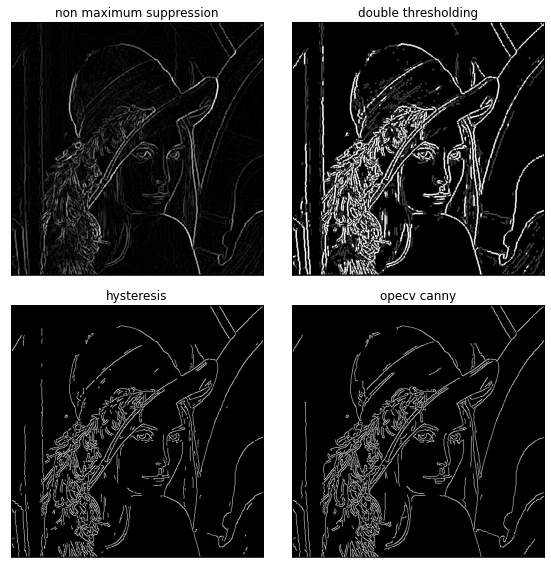

In [5]:
mag_thin = non_max_suppression(magnitude, angle)
t = 0.08

mag_th = double_threshold(mag_thin, t, 2*t)
res = canny_detector(frame, t, 2*t)

frame = 255*frame/frame.max()
edges = cv2.Canny(frame.astype('uint8'),60,120)

fig = plt.subplots(nrows=2, ncols=2, figsize=(8, 8))
titles = ['non maximum suppression','double thresholding', 'hysteresis', 'opecv canny']
images = [mag_thin, mag_th, res, edges]
mysubplot(images, titles, 2, 2)
